## Artificial_Intelligence_Data Science_Deep_Learning_Loan_Data_Analysis_Keras_Tensorflow

In [ ]:
"""
My project utilized the dataset “loan_data.csv,” obtained from the MS: AI Deep Learning Specialization, using Python programming with Simplilearn.
I have received permission to work on this dataset and to upload my Python code and results to my GitHub account. The goal of this work is to 
show my coding skills with results using the dataset related to the (Lending Club Loan Data Analysis) project.

"""

In [ ]:
"""
Objective: 

With historical loan data from 2007 to 2015, the goal of this project was to make a projective model which can pinpoint whether a loan offered
by “Lending Club” will credit risk or not. This project carried out implementing exploratory data analysis to identify borrower and loan 
attributes, encoding categorical features into numerical form, and implementing feature engineering to trim duplication and correlation among
features. A deep learning model was then developed using Keras with Tensorflow trained on the preprocessed dataset, and examined with various 
metrics such as confusion matrix, and classification reports, and roc-auc. 

"""

In [1]:
# Load pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv("loan_data.csv")

# Look at data structure
print (df.head(4))

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  


In [3]:
# look at shape of the dataset (# rows, # columns)
print("shape of the dataset", df.shape)

# go to a new row
print("\n")

# summary the dataset insights
print("summary of the dataset:\n", df.info())

print("\n")

# find statistics (summary ) for each feature
print("summary statistics of the dataset:\n", df.describe(include = "all"))


shape of the dataset (9578, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
summary of the dataset:
 None

## Feature Transformation: Transform categorical values into numerical values (discrete)    

In [5]:
# drop any spaces in the columns names
df.columns = [i.strip() for i in df.columns]
print(df.columns.tolist())

['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


In [7]:
# try to find a list of categorical columns
categorical_columns = df.select_dtypes(include =["object"]).columns.tolist()
print("a list of categorical columns:\n", categorical_columns)

a list of categorical columns:
 ['purpose']


In [9]:
# use one hot encoder for the categorical column, ["purpose"]
df = pd.get_dummies(df, columns = ["purpose"], drop_first = True)
print(df.head(3))

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                False                        True   
1        0               0                 True                       False   
2        0               0                False                        True   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0            

## Exploratory data analysis of different factors of the dataset 

In [15]:
"""
Goal:
understand the dataset trends, arrangements, and correlations with different columns before making a model
"""

'\nGoal:\n\nunderstand the dataset patterns, distributions, and relationships with different columns before making a model\n\n'

In [11]:
# find a list of numeric columns

numeric_columns = df.select_dtypes(include =["float64", "int64"]).columns.tolist()

print("a list of numeric columns:\n", numeric_columns)


a list of numeric columns:
 ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


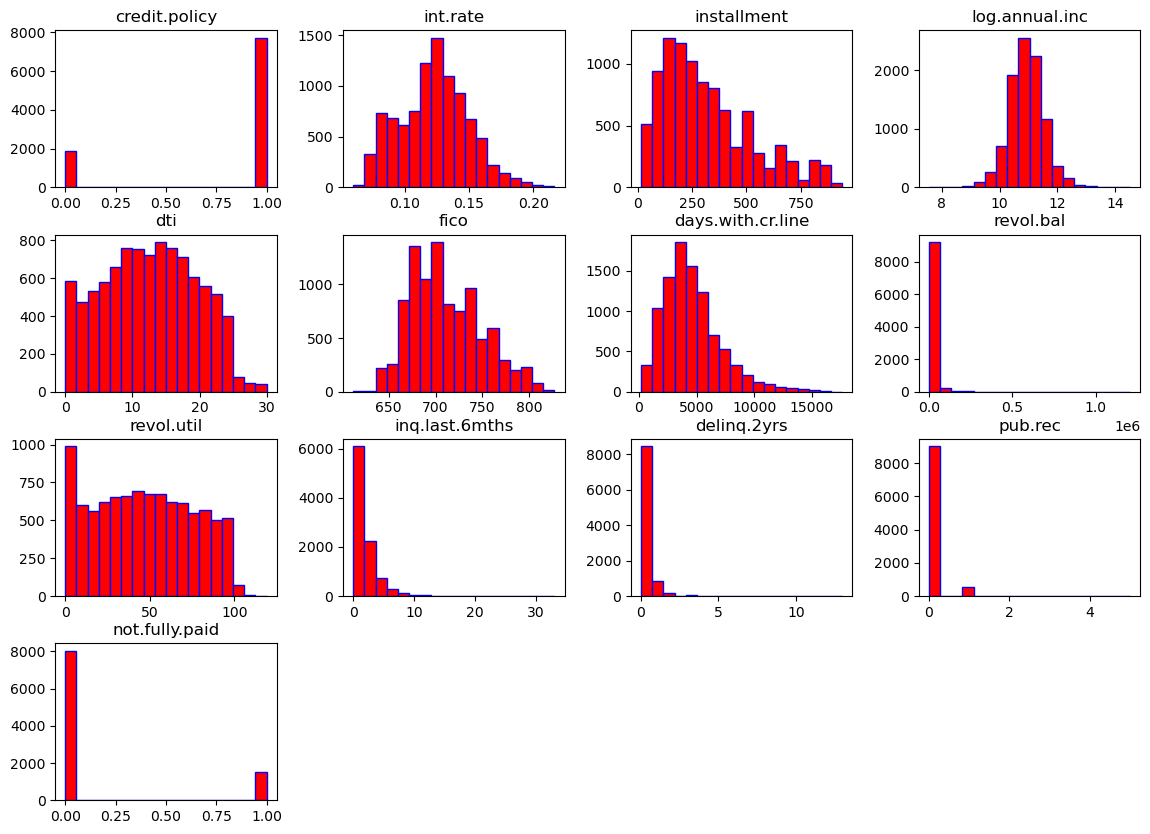

In [13]:
# hstograms plot with all numeric columns

import matplotlib.pyplot as plt

df[numeric_columns].hist(figsize = (14,10),  color = "red", edgecolor = "blue", bins = 18, grid = False)
plt.show()

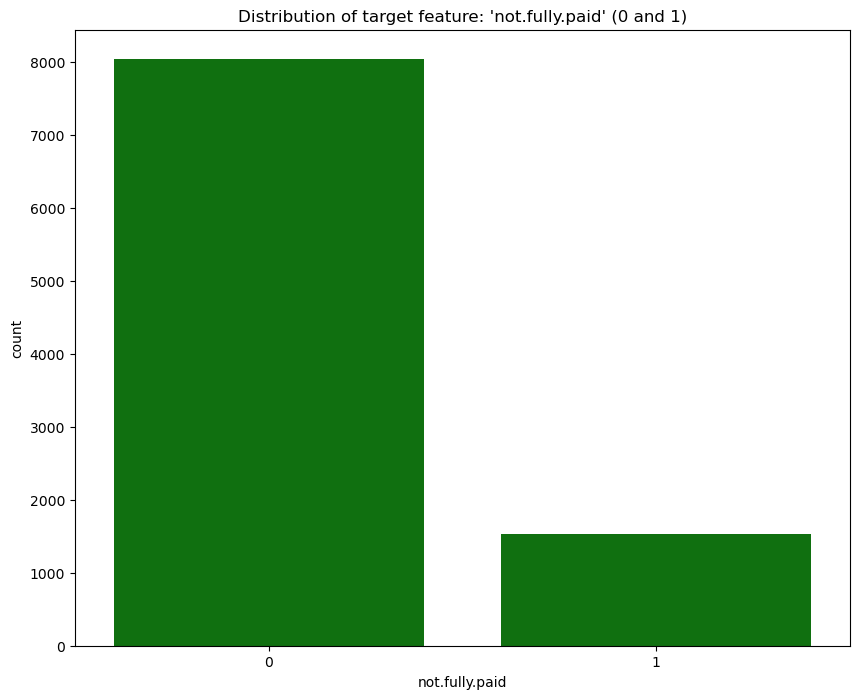

In [15]:
# know about the target feature

# visualize the target feature
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = "not.fully.paid", color = "green")
plt.title("Distribution of target feature: 'not.fully.paid' (0 and 1)")
plt.show()

In [23]:
# correlation between target and features
# Show only some examples

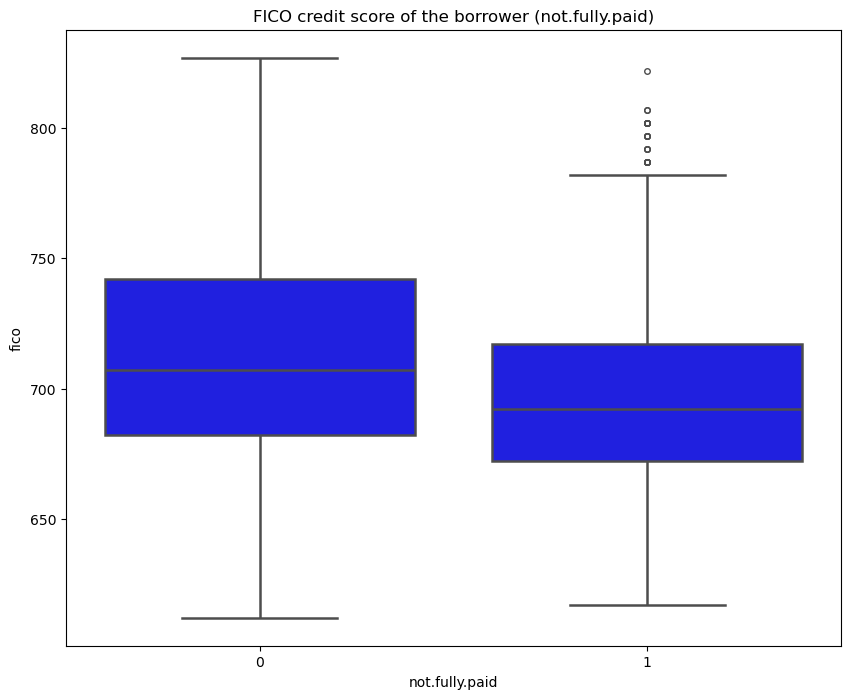

In [17]:
#  boxplot: fico: The FICO credit score of the borrower with "not.fully.paid"
plt.figure(figsize = (10, 8))
sns.boxplot(data = df, x = "not.fully.paid", y = "fico", color = "blue", linewidth = 1.8, fliersize = 4)
plt.title("FICO credit score of the borrower (not.fully.paid)")
plt.show()

In [28]:
# use Kernel Density Estimation  to see interest rate distribution (“int.rate”) vs target (“not.fully.paid”) 

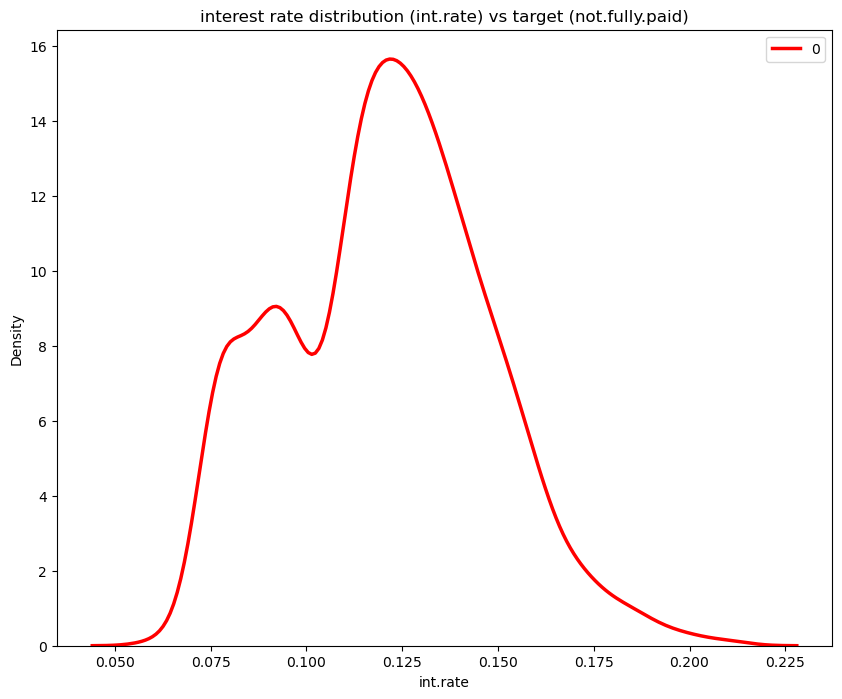

In [19]:
# kde plot for fully paid loan when (“not.fully.paid”) = 0

plt.figure(figsize = (10, 8))

sns.kdeplot(df.loc[df["not.fully.paid"] == 0,  "int.rate"], color = "red", linewidth = 2.5, bw_adjust = 1.2, label = "0")
plt.title("interest rate distribution (int.rate) vs target (not.fully.paid)")
plt.legend()
plt.show()

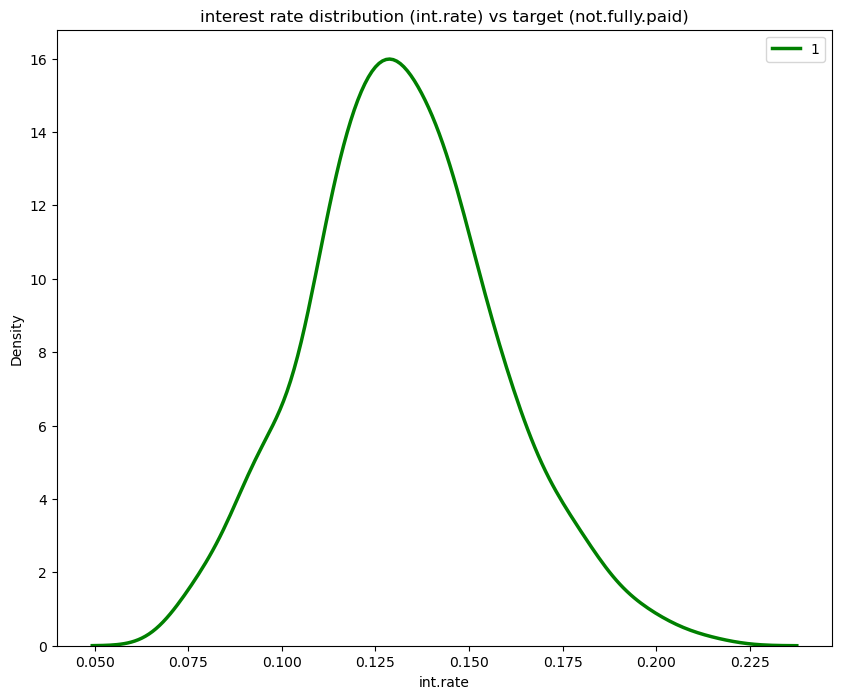

In [21]:
plt.figure(figsize = (10, 8))

sns.kdeplot(df.loc[df["not.fully.paid"] == 1,  "int.rate"], color = "green", linewidth = 2.5, bw_adjust = 1.2, label = "1")
plt.title("interest rate distribution (int.rate) vs target (not.fully.paid)")
plt.legend()          # 1 means not fully paid loan
plt.show()

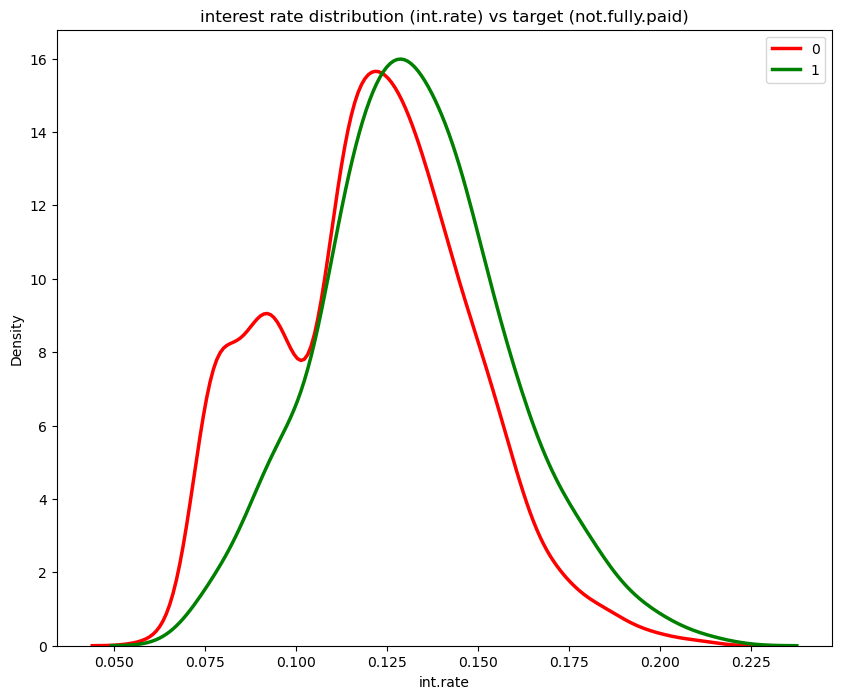

In [23]:
plt.figure(figsize = (10, 8))

sns.kdeplot(df.loc[df["not.fully.paid"] == 0,  "int.rate"], color = "red", linewidth = 2.5, bw_adjust = 1.2, label = "0")   # "0" means fully paid loan
sns.kdeplot(df.loc[df["not.fully.paid"] == 1,  "int.rate"], color = "green", linewidth = 2.5, bw_adjust = 1.2,label = "1")   # "1" means not fully pay loan
plt.title("interest rate distribution (int.rate) vs target (not.fully.paid)")
plt.legend()
plt.show()


In [25]:
# see the correlation matrix only for the numeric features

numeric_columns_corr = df.select_dtypes(include =["float64", "int64"]).corr()
print("correlation matrix for numeric columns:\n", numeric_columns_corr)


correlation matrix for numeric columns:
                    credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760    

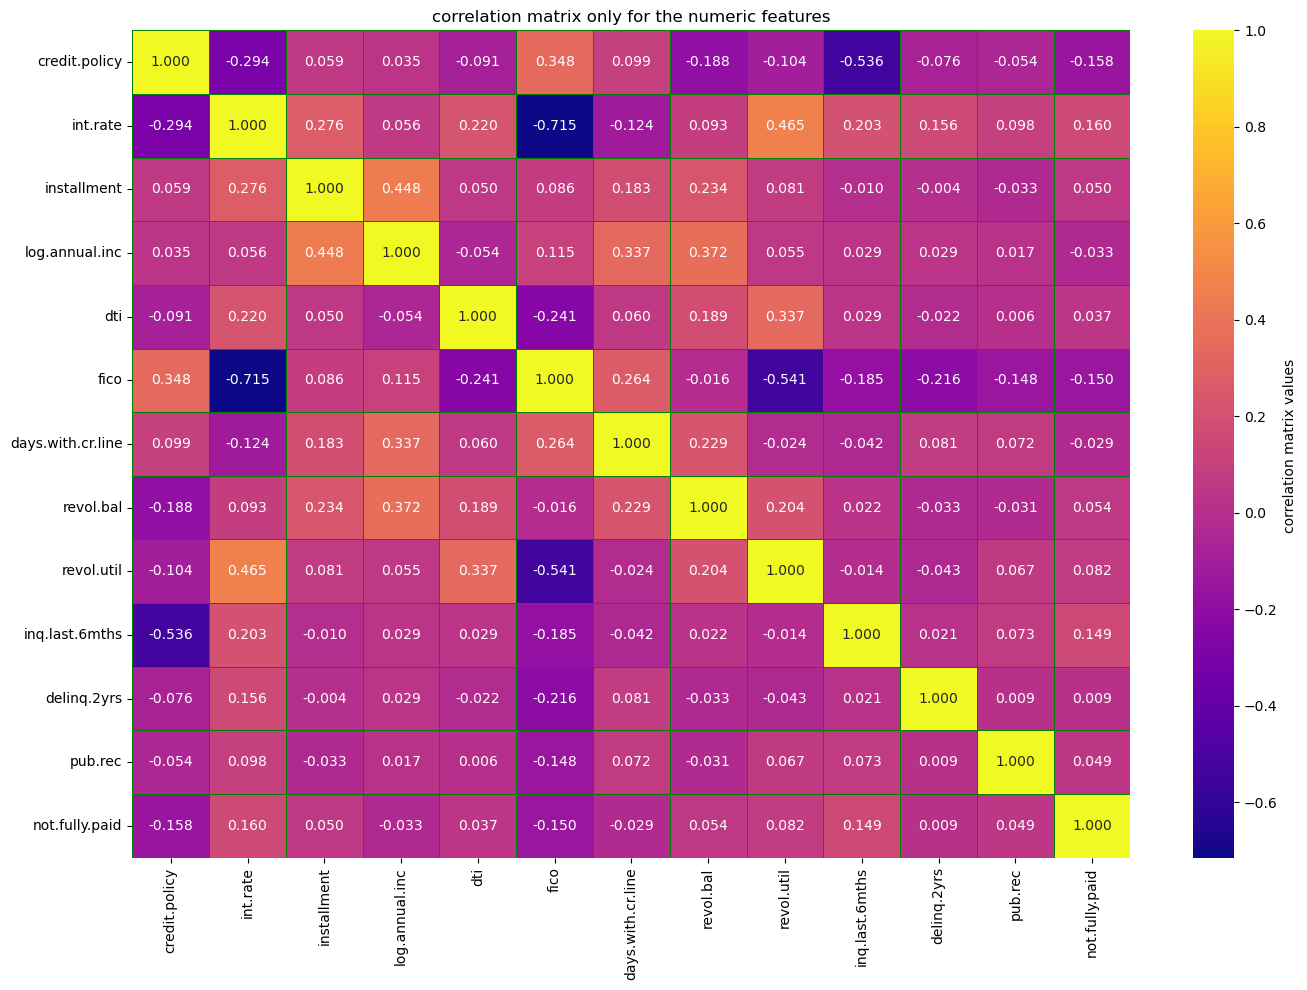

In [27]:
# plot the correlation matrix using a heatmap

plt.figure(figsize = (14, 10))

sns.heatmap(numeric_columns_corr, annot = True, fmt = ".3f", cmap = "plasma", linecolor = "green", linewidths = 0.4, cbar_kws = {"label": "correlation matrix values "})

plt.title ("correlation matrix only for the numeric features")
plt.tight_layout()
plt.show()

##  Additional Feature Engineering

In [29]:
# Make a new feature using "days.with.cr.line" feature
# change "days.with.cr.line" into year 
df["years.with.cr.line"] = df["days.with.cr.line"] /365.0   # new column "years.with.cr.line"

print(df.columns)

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business',
       'years.with.cr.line'],
      dtype='object')


In [31]:
#  log.annual.inc: The natural log of the self-reported annual income of the borrower.


annual_income_log = df["log.annual.inc"]

import numpy as np

# get the annual income from "log.annual.inc" using np.exp().
annual_income_regular = np.exp(annual_income_log)
print(annual_income_regular.head(3))

print("\n")

df["annual_income_regular"] = annual_income_regular          # new column added

display(df.columns)


0    85000.000385
1    65000.000073
2    31999.999943
Name: log.annual.inc, dtype: float64




Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business',
       'years.with.cr.line', 'annual_income_regular'],
      dtype='object')

In [33]:
# use the updated dataset ( 2 additional features) to find correlation matrix
correlation_matrix_updated = df.corr().abs()
#print("updated correlation matrix:\n", correlation_matrix_updated)

# do not repeat same correlation 2 times
# take either above or below triangle in the correlation matrix
below_correlation_matrix_updated  = correlation_matrix_updated.where(np.tril(np.ones(correlation_matrix_updated.shape), k = -1).astype(bool))


# find features with  correlation matrix element > 0.85

correlation_matrix_element_high = [i for i in below_correlation_matrix_updated.columns if any(below_correlation_matrix_updated [i] > 0.85)]
print(" correlation matrix element > 0.85:\n", correlation_matrix_element_high)
print("\n")

# drop  features with high  correlation 
df_update_drop = df.drop(columns = correlation_matrix_element_high)

print("\n")

# updated dataset
print(" number of features left:\n", df_update_drop.columns)

print("\n")

print(" shape after updating:\n", df_update_drop.shape)


 correlation matrix element > 0.85:
 ['days.with.cr.line']




 number of features left:
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs',
       'pub.rec', 'not.fully.paid', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'years.with.cr.line',
       'annual_income_regular'],
      dtype='object')


 shape after updating:
 (9578, 20)


In [52]:
# see correlation matrix with the updated dayaset (df_update_drop )

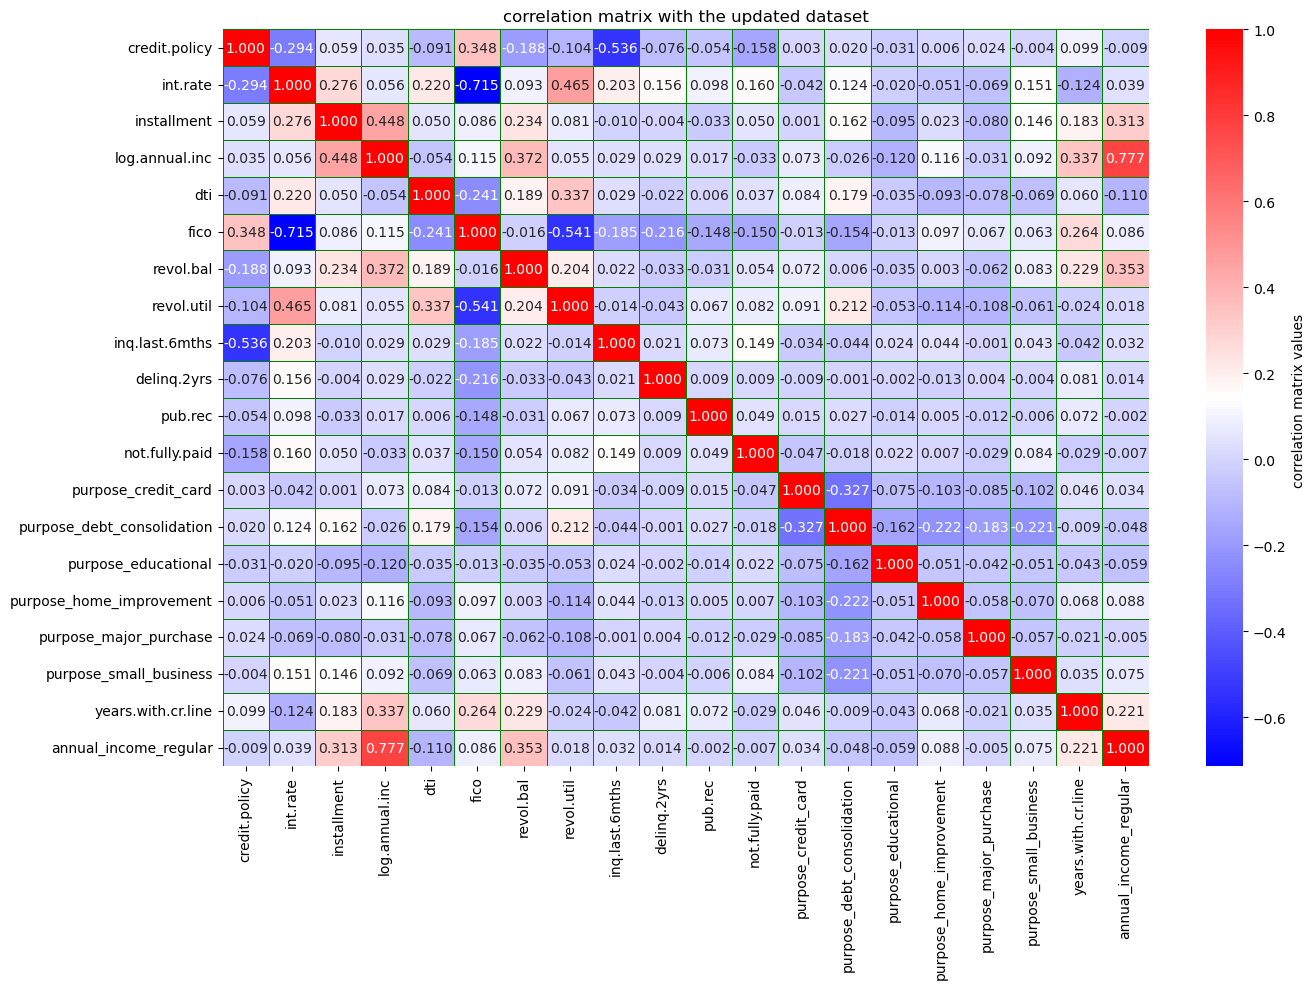

In [35]:
# see correlation matrix only for the numeric features

plt.figure(figsize = (14, 10))

sns.heatmap(df_update_drop.corr(), annot = True, fmt = ".3f", linecolor = "green", linewidths = 0.4, cmap = "bwr", cbar_kws = {"label": "correlation matrix values "})

plt.title ("correlation matrix with the updated dataset")
plt.tight_layout()
plt.show()

In [55]:
# Simillarly we can find correlation matrix  when correlation > abs. (0.60) and so on

## Modeling: build the predictive models ( a deep learning model) using Keras with Tensorflow backend

In [37]:
# data preparation

# state the target feature
label = "not.fully.paid"            # from the dataset (df)

# state the features (X)
X = df_update_drop.drop(columns = [label])
#print(X.head(3))

print("\n")

print("data type:\n", df_update_drop[label].dtype)

print("\n")

# state the target (y)
y = df_update_drop[label]
#print(y.head(3))

# Use train test split to split data (X, and y )
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

# list of numeric columns only
numeric_columns_X = X.select_dtypes(include = (np.number)).columns.tolist()
print("a list of numeric columns for X:\n", numeric_columns_X)

# make a data preprocessing pipeline for numerical features before giving them to a model used in machine learning

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# create a pipeline
num_feats_preprocessing_pipeline = Pipeline(steps=[("simple_imputer", SimpleImputer(strategy ="median")), ("standard_scaler", StandardScaler())])

# apply this pipeline to numeric features

from sklearn.compose import ColumnTransformer

column_transformer_num_features = ColumnTransformer(
    transformers = [("numeric_pipeline ", num_feats_preprocessing_pipeline, numeric_columns_X)], remainder = "passthrough", force_int_remainder_cols =False )


# fit the pipeline to the training data only 
# Apply transformation on the training data

column_transformer_num_features.fit(X_train)
X_train_fit_transformer =  column_transformer_num_features. transform(X_train)

print("\n")

print(X_train_fit_transformer)

## Apply transformation on the testing data
X_test_fit_transformer =  column_transformer_num_features. transform(X_test)

print("\n")

print(X_test_fit_transformer)

print("\n")

print(X_train_fit_transformer.dtype)   # it gives float64
print("\n")

print(X_test_fit_transformer.dtype)   # it gives float64
# we need float32 for TensorFlow and Keras

# float32 is required for Keras and TensorFlow
print("\n")

# make float32
X_train_fit_transformer_32 = np.array(X_train_fit_transformer, dtype = np.float32)
print(X_train_fit_transformer_32.dtype)     # it gives float32

print("X train fit transformer 32:\n", X_train_fit_transformer_32.shape) 


X_test_fit_transformer_32 = np.array(X_test_fit_transformer, dtype = np.float32)
print("\n")
print(X_test_fit_transformer_32.dtype)   #   # it gives float32
print("\n")
print("X test fit transformer 32:\n", X_test_fit_transformer_32.shape) 





data type:
 int64


a list of numeric columns for X:
 ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'years.with.cr.line', 'annual_income_regular']


[[ 0.49267998  0.68898129  2.15699846 ...  0.          0.
   0.        ]
 [ 0.49267998 -0.14121612 -0.10455157 ...  0.          0.
   0.        ]
 [-2.0297151   0.08316156  0.7963495  ...  0.          0.
   0.        ]
 ...
 [-2.0297151   0.95449487 -0.73619175 ...  0.          0.
   0.        ]
 [ 0.49267998 -1.71559949 -0.34096988 ...  0.          0.
   0.        ]
 [ 0.49267998  0.74507571  1.08005147 ...  0.          0.
   0.        ]]


[[ 0.49267998 -0.1112991   0.77891395 ...  0.          0.
   0.        ]
 [ 0.49267998  1.04050631  0.12940354 ...  0.          0.
   0.        ]
 [ 0.49267998  0.3561544   2.53512286 ...  1.          0.
   0.        ]
 ...
 [ 0.49267998  1.13773664  2.53154881 ...  0.          0.
   0.        ]
 [ 

In [39]:
# check number of samples (either 0 or 1 ) in the target, "not.fully.paid"

# count samples when target = 0
loans_paid_full = (y_train==0).sum()
print("full paid loans:\n", loans_paid_full)
print("\n")

# count samples when target = 1
loans_paid_not_full = (y_train==1).sum()
print("not full paid loans:\n", loans_paid_not_full)
print("\n")

# total samples
total_samples = loans_paid_full + loans_paid_not_full
print(" total_samples:\n", total_samples)
print("\n")

# sample weighting in the target  (not.fully.paid)
sample_weight = {1: ((total_samples/2) / (loans_paid_not_full)), 0: ((total_samples/2) / (loans_paid_full))}
print("sample_weight:\n", sample_weight)


full paid loans:
 6033


not full paid loans:
 1150


 total_samples:
 7183


sample_weight:
 {1: 3.1230434782608696, 0: 0.5953091331012763}


In [41]:
# make Keras deep learning model

print("shape:\n", X_train_fit_transformer_32.shape)

print("\n")

print("number of features:\n", X_train_fit_transformer_32.shape[1])

features_apply = X_train_fit_transformer_32.shape[1]
deep_neurons = [128, 64, 32, 16]   # neurons / layer
portion_neurons_remove = 0.25
learning_rate = 0.001


# load 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
import tensorflow as tf


def deep_learning_model_Keras_Tensorflow( features_apply, deep_neurons, portion_neurons_remove, learning_rate):
    sequential_nodel = Sequential()
    # first (initial) layer
    sequential_nodel.add(Input(shape = (features_apply,)))
    # first inner layer
    sequential_nodel.add(Dense(deep_neurons[0], activation = "relu"))
    sequential_nodel.add(BatchNormalization())
    sequential_nodel.add(Dropout(portion_neurons_remove))
    # add second, third, and fourth layers
    for layer in deep_neurons[1:]:   # Do not look at the first inner layer
        sequential_nodel.add(Dense(layer, activation = "relu"))
        sequential_nodel.add(BatchNormalization())
        sequential_nodel.add(Dropout(portion_neurons_remove))
    # final layer 
    sequential_nodel.add(Dense(1, activation = "sigmoid"))
    # use model tuner ("Adam")
    model_tuner_optimizers = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    # make the sequential_nodel fpr training
    sequential_nodel.compile(optimizer = model_tuner_optimizers,  metrics = ["AUC"], loss = "binary_crossentropy")
    return  sequential_nodel
    
# make a model
model = deep_learning_model_Keras_Tensorflow( features_apply, deep_neurons, portion_neurons_remove, learning_rate)

# summary
model.summary()


shape:
 (7183, 19)


number of features:
 19


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,401 (56.25 KB)

 Trainable params: 13,921 (54.38 KB)

 Non-trainable params: 480 (1.88 KB)

In [43]:
# fit deep learning model with evaluation tracking

# use EarlyStopping when monitor = "val_loss" does not show the pgrogress in fitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = "val_loss", patience = 8, restore_best_weights = True)

# save the fit model
from tensorflow.keras.callbacks import ModelCheckpoint

# file name
file_name = "fit_model.keras"

model_checkpoint = ModelCheckpoint(file_name, monitor = "val_AUC", mode = "max", save_best_only = True, verbose = 1)

# fit the model
fit_model = model.fit(X_train_fit_transformer_32, y_train, validation_data = (X_test_fit_transformer_32, y_test), epochs = 65, batch_size = 256,
callbacks = [early_stopping, model_checkpoint], class_weight = sample_weight, verbose = 2)

Epoch 1/65

Epoch 1: val_AUC improved from -inf to 0.63539, saving model to fit_model.keras
29/29 - 7s - 258ms/step - AUC: 0.5435 - loss: 0.8599 - val_AUC: 0.6354 - val_loss: 0.6663
Epoch 2/65

Epoch 2: val_AUC improved from 0.63539 to 0.63836, saving model to fit_model.keras
29/29 - 1s - 25ms/step - AUC: 0.5980 - loss: 0.7468 - val_AUC: 0.6384 - val_loss: 0.6712
Epoch 3/65

Epoch 3: val_AUC improved from 0.63836 to 0.64145, saving model to fit_model.keras
29/29 - 1s - 18ms/step - AUC: 0.5871 - loss: 0.7478 - val_AUC: 0.6414 - val_loss: 0.6792
Epoch 4/65

Epoch 4: val_AUC did not improve from 0.64145
29/29 - 0s - 14ms/step - AUC: 0.6124 - loss: 0.7089 - val_AUC: 0.6396 - val_loss: 0.6802
Epoch 5/65

Epoch 5: val_AUC did not improve from 0.64145
29/29 - 0s - 14ms/step - AUC: 0.6059 - loss: 0.7100 - val_AUC: 0.6412 - val_loss: 0.6876
Epoch 6/65

Epoch 6: val_AUC improved from 0.64145 to 0.64645, saving model to fit_model.keras
29/29 - 1s - 22ms/step - AUC: 0.6088 - loss: 0.6986 - val_AUC

## Model evaluation

In [47]:
model.load_weights(file_name)

# probabilities predicted from model
y_probabilities_predict = model.predict(X_test_fit_transformer_32).ravel()

print("\n")

print(y_probabilities_predict)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[0.52690077 0.60780966 0.5582097  ... 0.4677008  0.5392091  0.55491126]


In [49]:
# change probability to either 1 or 0
y_probabilities_binary = (y_probabilities_predict >= 0.5).astype(int)
print(y_probabilities_binary)

[1 1 1 ... 0 1 1]


In [51]:
# find matrix
from sklearn.metrics import roc_auc_score
print("roc auc score:\n", roc_auc_score(y_test, y_probabilities_predict))

print("\n")

# get classification resultss
from sklearn.metrics import classification_report

print(classification_report(y_test, y_probabilities_binary, digits = 3))

roc auc score:
 0.6584955021827261


              precision    recall  f1-score   support

           0      0.910     0.468     0.618      2012
           1      0.213     0.757     0.333       383

    accuracy                          0.514      2395
   macro avg      0.562     0.613     0.476      2395
weighted avg      0.799     0.514     0.573      2395



In [59]:
# find a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matr = confusion_matrix(y_test, y_probabilities_binary)
#print("confusion matrix(:\n", conf_matr)

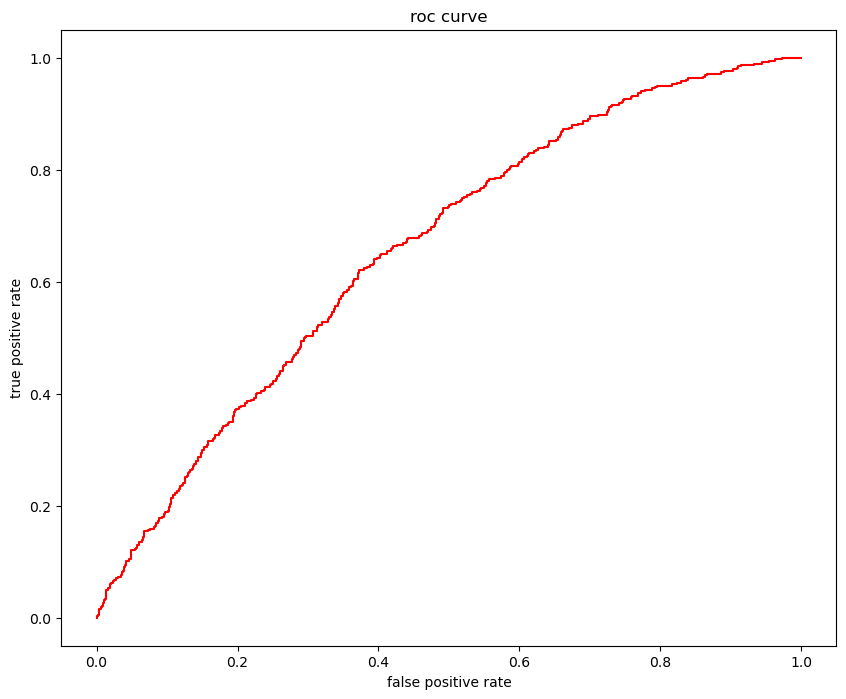

In [57]:
# roc curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_probabilities_predict)

plt.figure(figsize = (10, 8))

plt.plot(false_positive_rate, true_positive_rate, color = "red")
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title("roc curve")
plt.show()


In [ ]:

"""
Conclusion: 

The study demonstrated that the loan dataset is significantly uneven, with notably a smaller number of loan defaults relative to completely 
paid loans. After preprocessing and variable filtering, the deep learning model accomplished a “roc-auc” score of ~ 0.66, highlighting intermediate
forecasting proficiency. Even though the model revealed significant detection rate (~0.76) for loan defaults, it underperformed with 
correctness (~0.21) which indicates the difficulties of class asymmetry in financial datasets. This project shows the deep learning for credit 
uncertainty projections and focusing further necessary refinements through innovative methods such as resampling and boosting approaches to
improve predictive accuracy.

"""